In [145]:
import numpy as np #Librería especializada en el cálculo numérico y análisis de datos. Soporte para crear vectores y matrices grandes.
%matplotlib inline 
    #Genera gráficas dentro de la notebook.
%config InlineBackend.figure_format='retina' #"%config" configura cómo se ven los gráficos. 
#"IlineBancked" se refiere al 'motor' de cómo ses muestran los gráficos. "figure_format" formato de salida de los gráficos/calidad. 
#'retina' se refiere a una calidad alta.
import matplotlib.pyplot as plt 
import matplotlib as mpl

In [146]:
# mpl.rcParams['text.usetex'] = True
#rcParams es un diccionario de parámetros. El argumento entre corchetes es una clave del diccionario.
#En este caso hace referencia al uso de Latex. 'True' lo activa.
mpl.rcParams['mathtext.fontset'] = 'stix' #mathtex.fontsent controla la fuente. stix es el valor de la clave, en este caso el valor de la fuente utilizada.
mpl.rcParams['font.family'] = 'serif' #Controla la familia de fuentes utilizadas por mpl. serif es la familia de fuentes con serif.
mpl.rcParams['font.sans-serif'] = 'stix' #Controla la fuente sans-serif
import sympy #lib. para matemáticas simbólicas.
sympy.init_printing() #imprime caracteres 'unicode' para expresiones matemáticas.
from scipy import integrate #herramientas y algoritmos matemáticos. Integración

## Oscilador armónico

In [147]:
#"Un sistema cualquiera, mecánico, eléctrico, neumático, etc., es un oscilador armónico si, cuando se deja en 'libertad' fuera de
#su posición de equilibrio vuelve hacia ella describiendo oscilaciones sinusoilades, o sinusoilades amortiguadas en torno a dicha posición estable".

In [148]:
t, omega0 = sympy.symbols("t, omega_0", positive=True) #símbolos considerados solo como positivos.

In [149]:
gamma = sympy.symbols ("gamma", complex=True) #gamma considerado como un número complejo.

In [150]:
x=sympy.Function('x') #variable x como función

In [151]:
ode=x(t).diff(t,2)+2*gamma*omega0*x(t).diff(t)+omega0**2*x(t) #expresión de oscilador armónico.

In [152]:
ode #impresion de la expresión anterior.

In [153]:
ode_sol=sympy.dsolve(ode) #solución de la expresión anterior.

In [154]:
ode_sol #impresión de la solución.

In [155]:
ics={x(0):1, x(t).diff(t).subs(t,0):0} #condiciones inciales

In [156]:
ics #impresión de las condiciones iniciales

In [157]:
def apply_ics(sol, ics, x, known_params):
    """
    Apply the initial conditions (ics), given as a dictionary on
    the form ics = {y(0): y0: y(x).diff(x).subs(x, 0): yp0, ...}
    to the solution of the ODE with indepdendent variable x.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """
    #Definición de la función apply_ics. apply_ics realizalo escrito abajo.
    free_params = sol.free_symbols - set(known_params) 
    #free_symbols devuelve el conjunto de símbolos que NO están definidos explicítamente.
    #known_params son los parámetros definidos previamente.
    #set() permite operaciones de conjuntos. En este caso se está realizando una diferencia de conjuntos determinada por el símbolo '-'.
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
    #Calcula la derivada de grado n de la EDO, luego la evalúa en el punto x=0 y sustituye condiciones iniciales.
    #Dado los anterior procede a hacer una comparación de la derivada determinada por el símbolo '-'.
           for n in range(len(ics))] #lens(ics) genera una lista de las condiciones iniciales.
                                     #Toma los valores de n dentro del intervalo que va desde 0 a lens(ics)-1.
    sol_params = sympy.solve(eqs, free_params) 
    return sol.subs(sol_params)

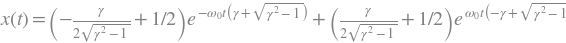

In [158]:
x_t_sol=apply_ics(ode_sol,ics,t,[omega0,gamma]) #uso de la función definida anteriormente para dar solución a la EDO.
x_t_sol #impresión de la solución

In [159]:
x_t_critical=sympy.limit(x_t_sol.rhs,gamma,1) #Cálcula el límite de la expresión cuando gamma tiende a uno.
x_t_critical #Valor del límite cuando gamma tiende a uno.

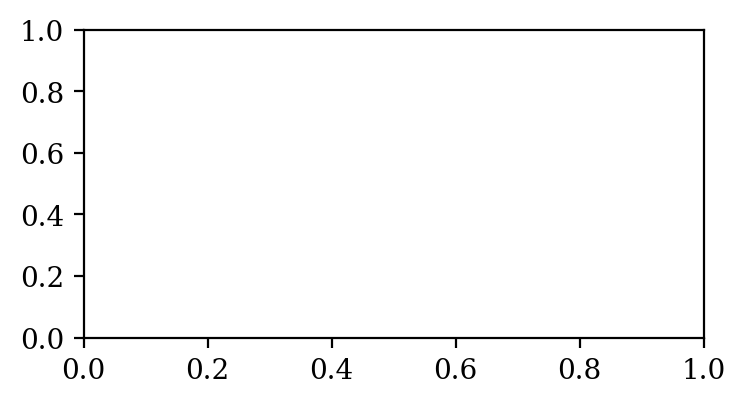

In [160]:
fig,ax=plt.subplots(figsize=(4,2)) #determina la figura, consigo los ejes del gráfico. figsize determina el tamaño en pulgadas de la figura.

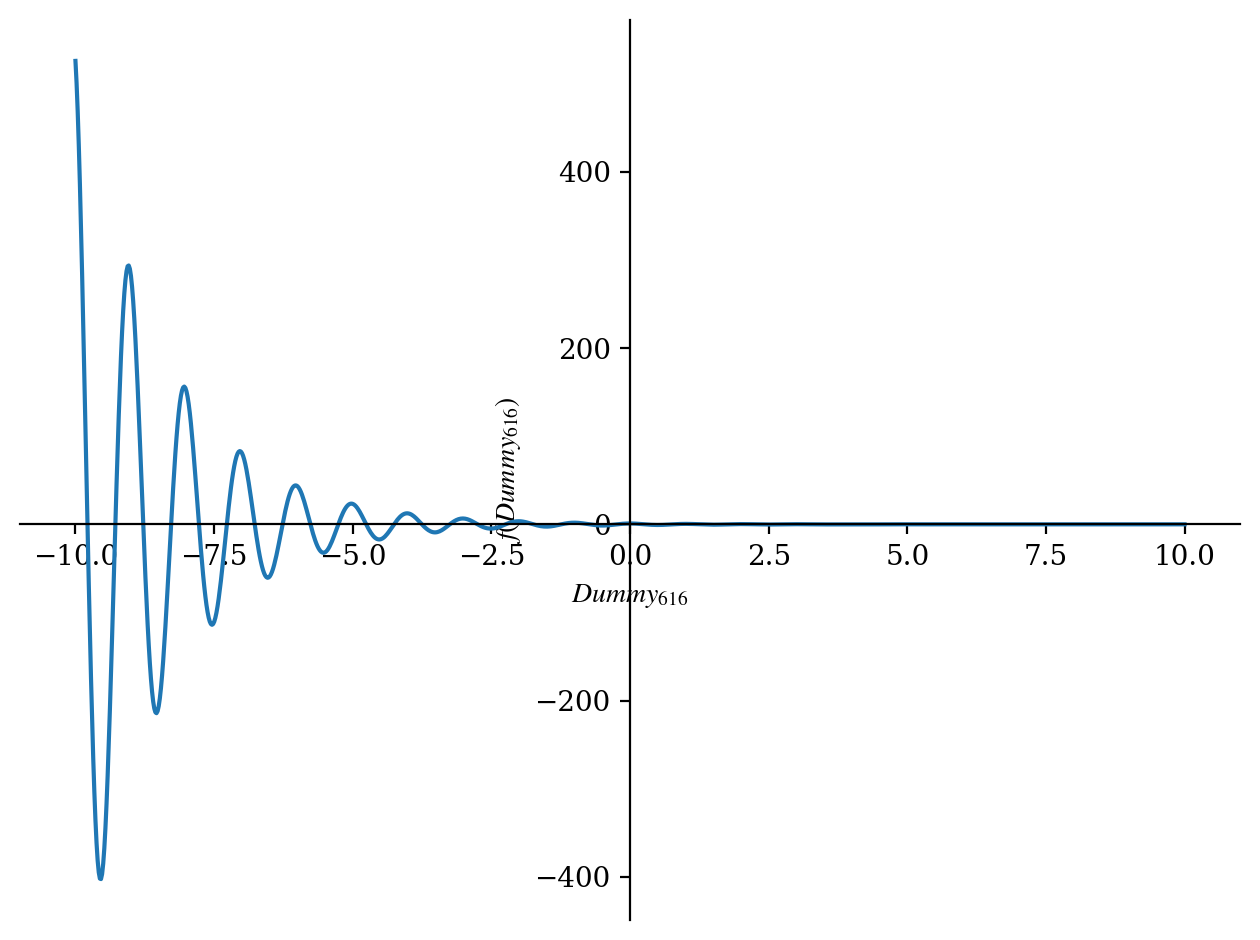

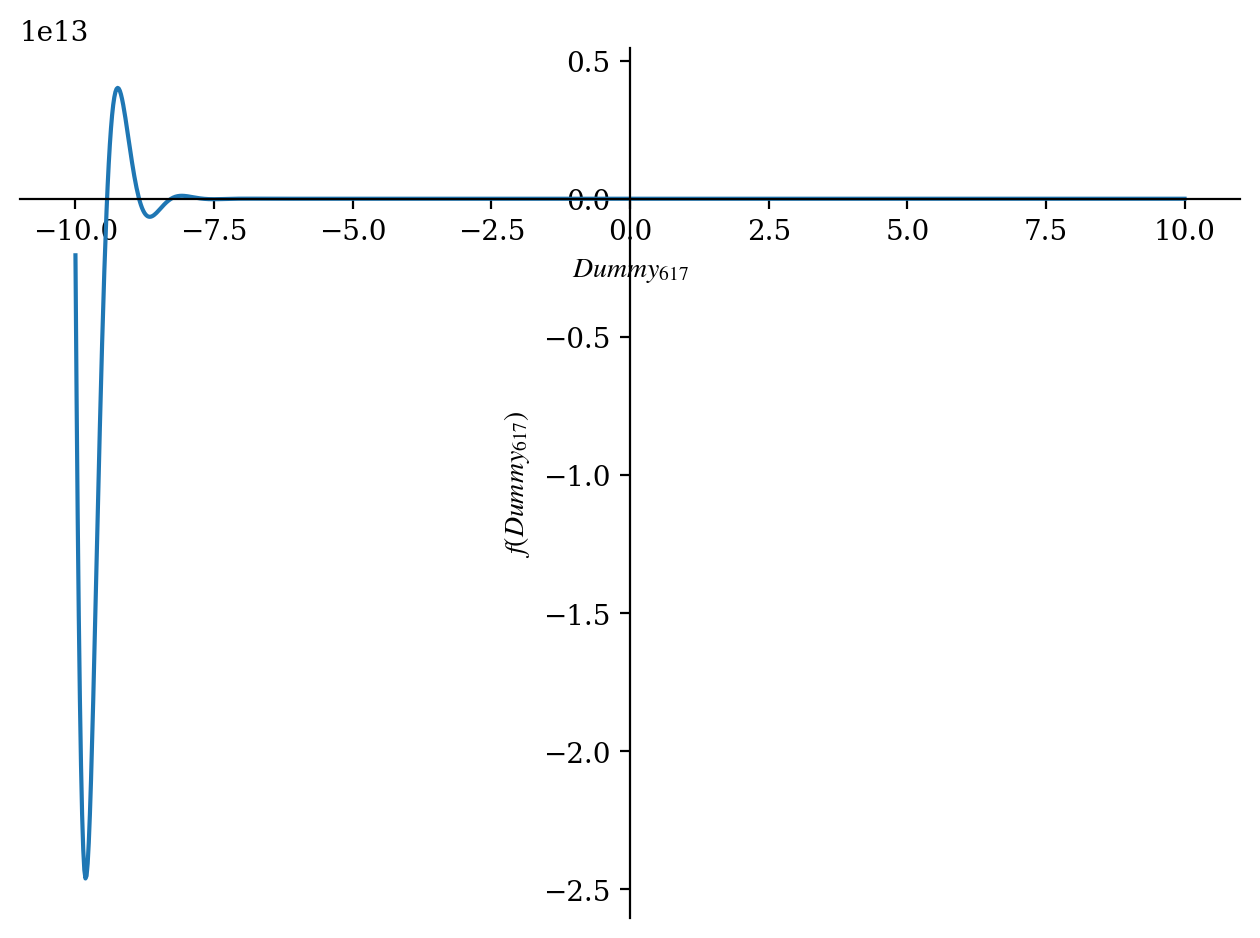

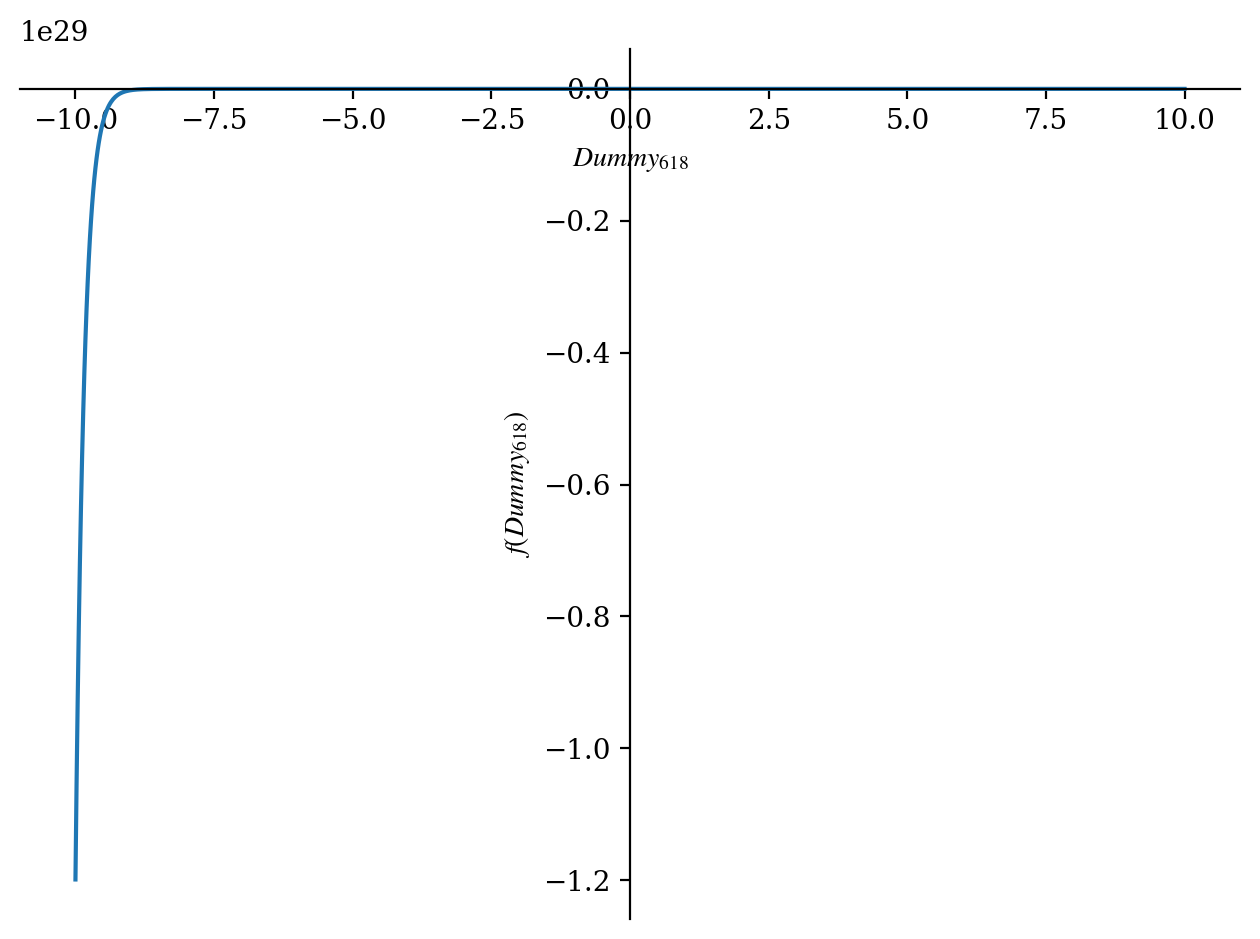

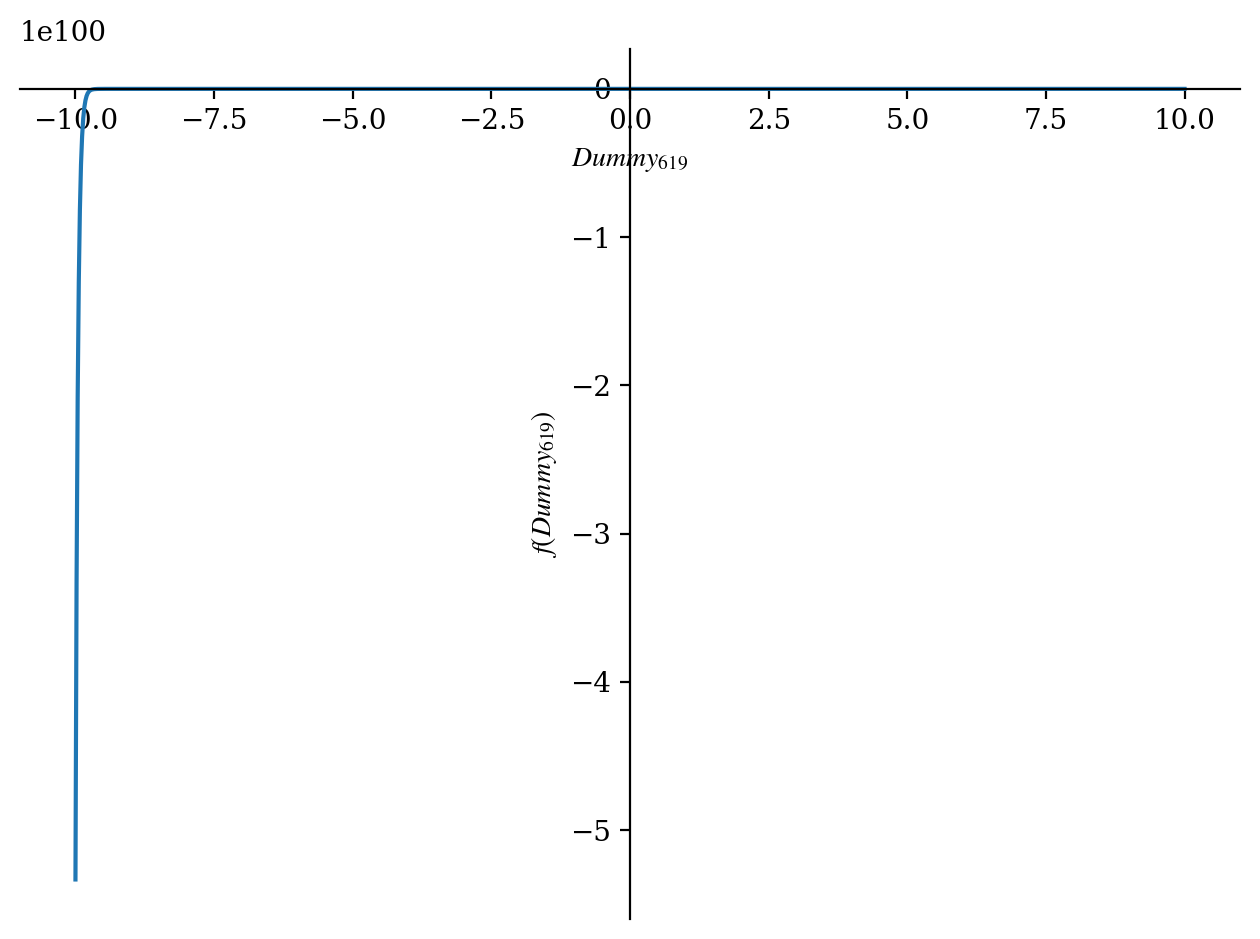

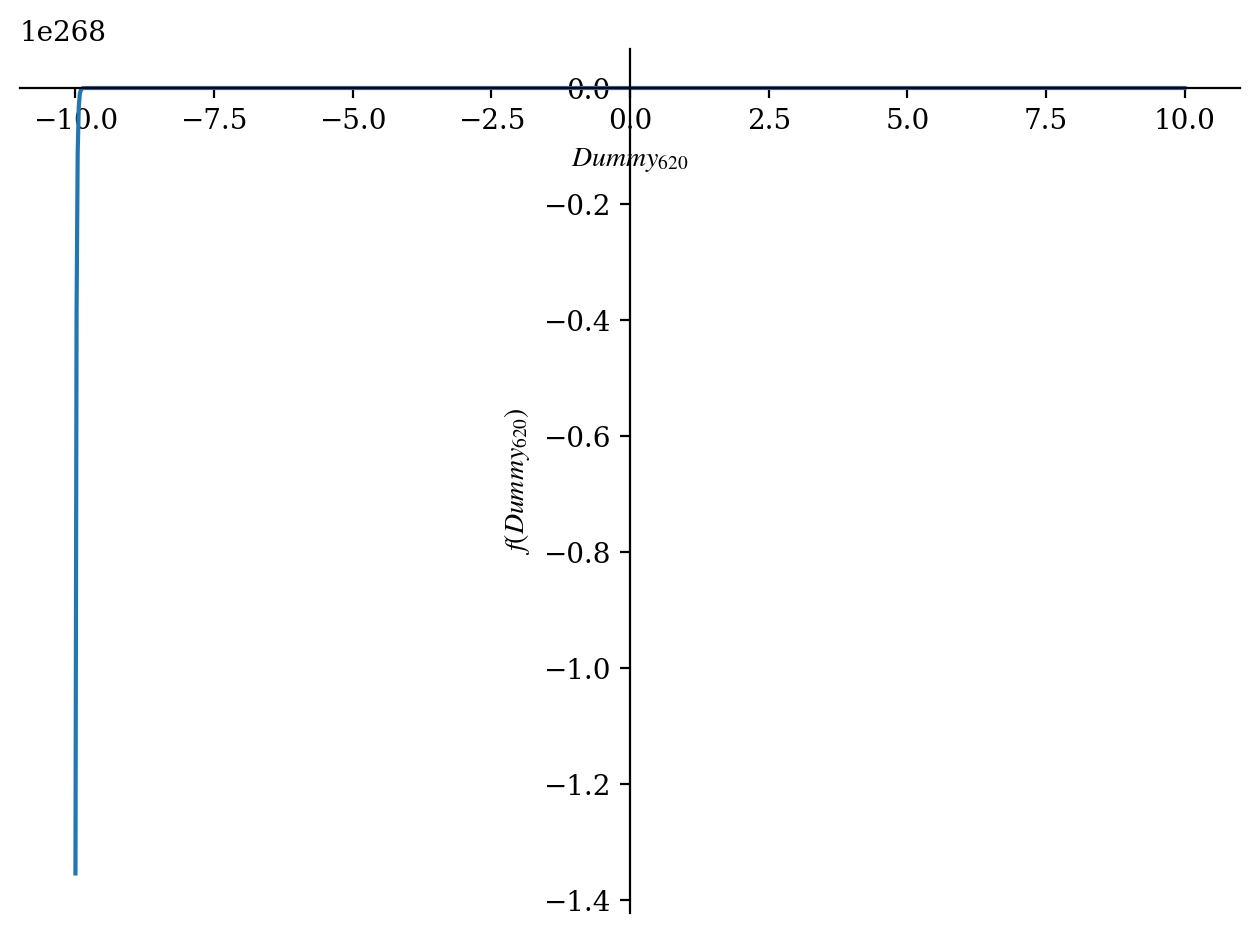

In [161]:
from sympy.plotting import plot
tt = np.linspace(0, 3, 250) #250 indica los elementos de la partición generados en el intervalo 0 y 3.
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: 2.0 * sympy.pi}), 'numpy')
        plot(x_t)
    #Se crea una función numérica que evalúa x_t_critical para diferentes valores de t utilizando la sustitución de omega y la gráfica.
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: 2.0 * sympy.pi, gamma: g}), 'numpy')
        plot(x_t)
    #Se crea una función numérica que evalúa la expresión x_t_sol con sustittución de omega0 y gamma, y la gráfica.
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
    #Grafica la función x_t en función de los valores de tt. Selecciona la parte real de x_t(tt).
    #Label agrega los nombres de los ejes. $\gamma=g indica el valor de gamma,  %.1f$ muestra el valor de g con un decimal.

In [162]:
ax.set_xlabel(r"$t$", fontsize=8) #nombre del eje x, y toma en cuenta el valor de la fuente.
ax.set_ylabel(r"$x(t)$", fontsize=8) #nombre del eje y, y toma en cuenta el tamaño de la fuente.
ax.set_xlim(0, 10) #rango del eje x.
ax.legend() #ajusta el diseño del gráfico.

fig.tight_layout()

## Oscilador armónico simple

In [163]:
#El oscilador armónico es uno de los sistemas más estudiados en física, ya que todo sistema que oscila al rededor de un punto
#de equilibrio estable se puede estudiar en primera aproximación como si fuera un oscilador. 
#La característica principal es que está sometida a una fuerza recuperadora.

In [164]:
#El oscilador armónico simple es el caso más sencillo dónde únicamente se considera la fuerza recuperadora.

In [165]:
t, omega1 = sympy.symbols("t, omega_1", positive=True) #símbolos considerados solo como positivos.

In [166]:
x1=sympy.Function('x1') #variable x como función

In [167]:
ode1=x1(t).diff(t,2)+omega1**2*x1(t) #expresión de oscilador armónico simple o movimiento vibratorio libre no amotiguado.

In [168]:
ode1 #impresión de la expresión anterior.

In [169]:
ode1_sol=sympy.dsolve(ode1) #solución de la expresión anterior.

In [170]:
ode1_sol

In [171]:
ics1={x(0):1, x(t).diff(t).subs(t,0):0} #condiciones inciales

In [172]:
ics1

In [173]:
def apply_ics1(sol, ics1, x1, known_params2):
    """
    Apply the initial conditions (ics1), given as a dictionary on
    the form ics1 = {y(0): y0: y(x1).diff(x1).subs(x1, 0): yp0, ...}
    to the solution of the ODE with indepdendent variable x1.
    The undetermined integration constants C1, C2, ... are extracted
    from the free symbols of the ODE solution, excluding symbols in
    the known_params list.
    """
    #Definición de la función apply_ics. apply_ics realizalo escrito abajo.
    free_params2 = sol.free_symbols - set(known_params2) 
    #free_symbols devuelve el conjunto de símbolos que NO están definidos explicítamente.
    #known_params son los parámetros definidos previamente.
    #set() permite operaciones de conjuntos. En este caso se está realizando una diferencia de conjuntos determinada por el símbolo '-'.
    eqs2 = [(sol.lhs.diff(x1, n) - sol.rhs.diff(x1, n)).subs(x1, 0).subs(ics1)
    #Calcula la derivada de grado n de la EDO, luego la evalúa en el punto x=0 y sustituye condiciones iniciales.
    #Dado los anterior procede a hacer una comparación de la derivada determinada por el símbolo '-'.
           for n in range(len(ics1))] #lens(ics) genera una lista de las condiciones iniciales.
                                     #Toma los valores de n dentro del intervalo que va desde 0 a lens(ics)-1.
    sol_params = sympy.solve(eqs2, free_params2) 
    return sol.subs(sol_params)

In [174]:
x_t_sol1=apply_ics1(ode1_sol,ics1,t,[omega1]) #uso de la función definida anteriormente para dar solución a la EDO.
x_t_sol1 #impresión de la solución

In [175]:
x_t_critical1=sympy.limit(x_t_sol1.rhs,omega1,0) #Cálcula el límite de la expresión cuando gamma tiende a uno.
x_t_critical1 #Valor del límite cuando gamma tiende a uno.

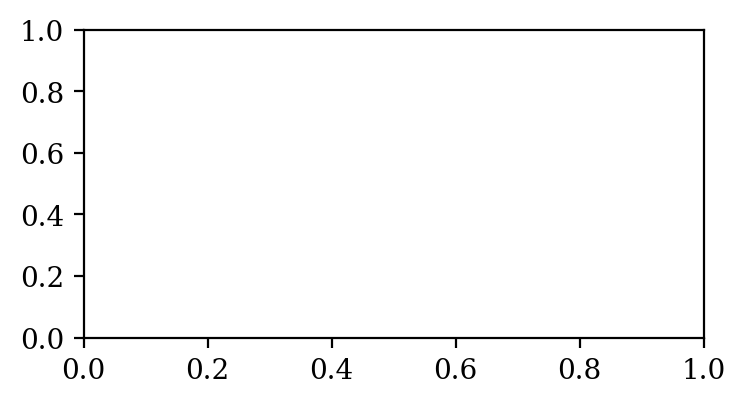

In [176]:
fig,ax=plt.subplots(figsize=(4,2)) #determina la figura, consigo los ejes del gráfico. figsize determina el tamaño en pulgadas de la figura.

In [180]:
from sympy.plotting import plot
tt = np.linspace(0, 3, 250) #250 indica los elementos de la partición generados en el intervalo 0 y 3.


In [181]:
      #x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega1: 2.0 * sympy.pi}), 'numpy')
        #plot(x_t)